## Estatísticas 

### Estatística Descritiva

In [1]:
import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

terror    = np.array([1, 0, 0, 0, 0, 0, 0, 1])
type(terror)

np.count_nonzero(terror)


2

In [5]:
import pyodbc

# Configurando a conexão com o SQL Server
server = 'ultraflowdbserver.database.windows.net'
database = 'ultraflowdb'
username = 'usuario_ultraflow'
password = '@database.password123!'
driver = '{ODBC Driver 17 for SQL Server}'

# String de conexão
connection_string = f'DRIVER={driver};SERVER={server};DATABASE={database};UID={username};PWD={password};Timeout=30'

# Tentando conectar
try:
    conn = pyodbc.connect(connection_string)
    print("Conexão bem-sucedida!")
except pyodbc.Error as ex:
    print(f"Erro ao conectar: {ex}")




Conexão bem-sucedida!


### Cálculo de Estatísticas Descritivas para Colunas Numéricas

In [13]:
import pandas as pd
from sqlalchemy import create_engine
from urllib.parse import quote_plus

# Configurando a conexão com o SQL Server
server = 'ultraflowdbserver.database.windows.net'
database = 'ultraflowdb'
username = 'usuario_ultraflow'
password = '@database.password123!'
driver = 'ODBC Driver 17 for SQL Server'

# Criando a string de conexão
connection_string = f'mssql+pyodbc://{username}:{quote_plus(password)}@{server}/{database}?driver={quote_plus(driver)}'

# Criando o engine de conexão
engine = create_engine(connection_string)

# Consulta para listar todas as tabelas do banco de dados
query = "SELECT TABLE_NAME FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_TYPE = 'BASE TABLE'"
tables_df = pd.read_sql(query, engine)

# Exibindo os nomes das tabelas
print("Tabelas disponíveis no banco de dados:")
print(tables_df)







Tabelas disponíveis no banco de dados:
                        TABLE_NAME
0                            teste
1                 dRegionaisDEPARA
2                          Address
3                    dFornecedores
4                           dObras
5                 dContasContabeis
6                 SalesOrderHeader
7                 SalesOrderDetail
8   ProductModelProductDescription
9               ProductDescription
10                       dProdutos
11                    dCompradores
12                        Customer
13                 fPedidosCompras
14                  dCondPagamento
15                 CustomerAddress
16                 ProductCategory
17                    dCentroCusto
18                       dArmazens
19                    ProductModel
20                         Product


In [21]:
import pandas as pd
from sqlalchemy import create_engine
from urllib.parse import quote_plus

# Configurando a conexão com o SQL Server
server = 'ultraflowdbserver.database.windows.net'
database = 'ultraflowdb'
username = 'usuario_ultraflow'
password = '@database.password123!'
driver = 'ODBC Driver 17 for SQL Server'

# Criando a string de conexão
connection_string = f'mssql+pyodbc://{username}:{quote_plus(password)}@{server}/{database}?driver={quote_plus(driver)}'

# Criando o engine de conexão
engine = create_engine(connection_string)

# Consulta para listar todas as tabelas com seus esquemas no banco de dados
query = "SELECT TABLE_SCHEMA, TABLE_NAME FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_TYPE = 'BASE TABLE'"
tables_df = pd.read_sql(query, engine)

# Exibindo os nomes das tabelas com seus esquemas
print("Tabelas disponíveis no banco de dados com esquemas:")
print(tables_df)





Tabelas disponíveis no banco de dados com esquemas:
   TABLE_SCHEMA                      TABLE_NAME
0       sandbox                           teste
1   Suprimentos                dRegionaisDEPARA
2       SalesLT                         Address
3   Suprimentos                   dFornecedores
4   Suprimentos                          dObras
5   Suprimentos                dContasContabeis
6       SalesLT                SalesOrderHeader
7       SalesLT                SalesOrderDetail
8       SalesLT  ProductModelProductDescription
9       SalesLT              ProductDescription
10  Suprimentos                       dProdutos
11  Suprimentos                    dCompradores
12      SalesLT                        Customer
13  Suprimentos                 fPedidosCompras
14  Suprimentos                  dCondPagamento
15      SalesLT                 CustomerAddress
16      SalesLT                 ProductCategory
17  Suprimentos                    dCentroCusto
18  Suprimentos                     

In [22]:
import pandas as pd
from sqlalchemy import create_engine
from urllib.parse import quote_plus

# Configurando a conexão com o SQL Server
server = 'ultraflowdbserver.database.windows.net'
database = 'ultraflowdb'
username = 'usuario_ultraflow'
password = '@database.password123!'
driver = 'ODBC Driver 17 for SQL Server'

# Criando a string de conexão
connection_string = f'mssql+pyodbc://{username}:{quote_plus(password)}@{server}/{database}?driver={quote_plus(driver)}'

# Criando o engine de conexão
engine = create_engine(connection_string)

# Lista das tabelas com esquemas completos
tables_with_schema = [
    'Suprimentos.dContasContabeis', 
    'SalesLT.SalesOrderHeader', 
    'SalesLT.SalesOrderDetail', 
    'Suprimentos.fPedidosCompras', 
    'Suprimentos.dProdutos'
]

# Loop para calcular estatísticas descritivas para cada tabela
for table_name in tables_with_schema:
    try:
        # Carregando os dados da tabela
        query = f"SELECT * FROM {table_name}"
        df = pd.read_sql(query, engine)

        # Calculando estatísticas descritivas para colunas numéricas
        numerical_stats = df.describe()

        # Exibindo as estatísticas
        print(f"\nEstatísticas Descritivas para a Tabela: {table_name}")
        print(numerical_stats)
    except Exception as e:
        print(f"Erro ao processar a tabela {table_name}: {e}")



Estatísticas Descritivas para a Tabela: Suprimentos.dContasContabeis
       C CONTAB    DESC CONTA CONTAB  SITUAÇÃO       TIPO
count      1130                 1130      1130       1130
unique     1130                  675         2          2
top     6110101  BANCO DO BRASIL S/A  LIBERADO  ANALITICA
freq          1                    7      1095       1095

Estatísticas Descritivas para a Tabela: SalesLT.SalesOrderHeader
       SalesOrderID  RevisionNumber            OrderDate              DueDate  \
count     32.000000            32.0                   32                   32   
mean   71859.593750             2.0  2008-06-01 00:00:00  2008-06-13 00:00:00   
min    71774.000000             2.0  2008-06-01 00:00:00  2008-06-13 00:00:00   
25%    71810.500000             2.0  2008-06-01 00:00:00  2008-06-13 00:00:00   
50%    71860.500000             2.0  2008-06-01 00:00:00  2008-06-13 00:00:00   
75%    71905.250000             2.0  2008-06-01 00:00:00  2008-06-13 00:00:00   
max    

### Código para Análise Detalhada e Visualização

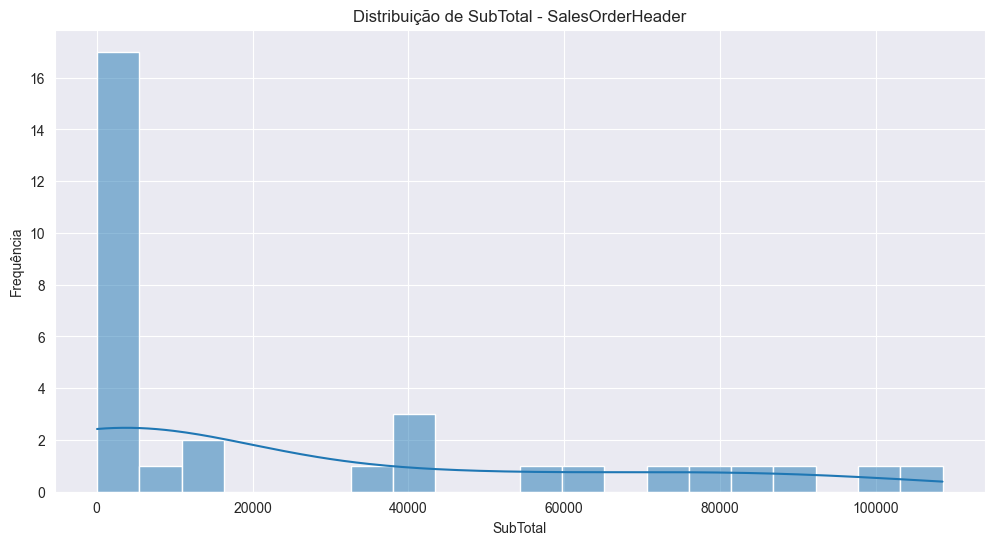

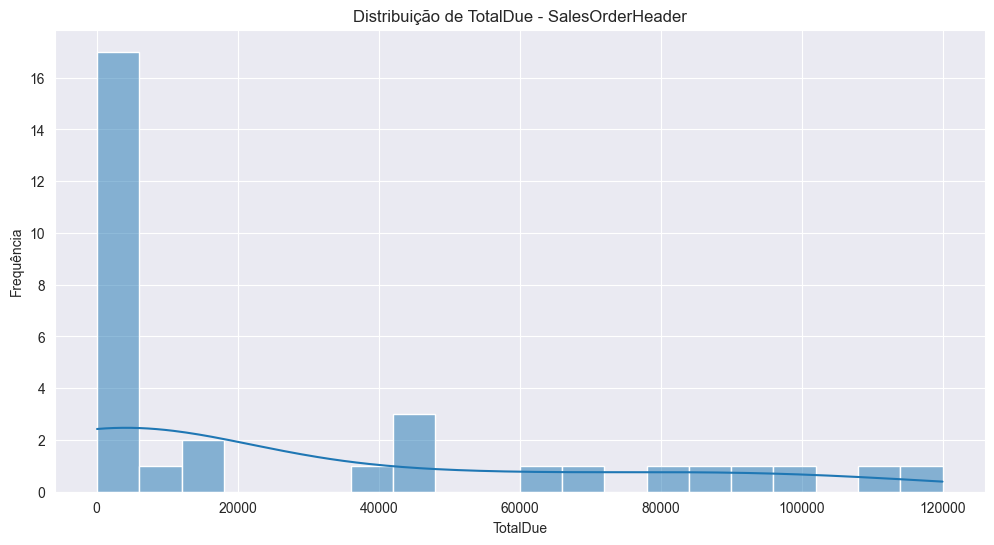

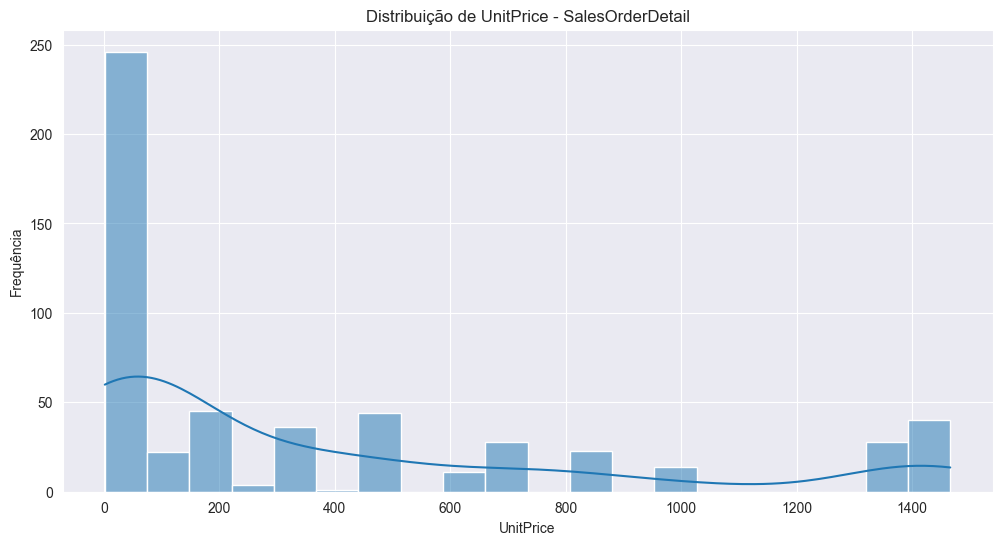

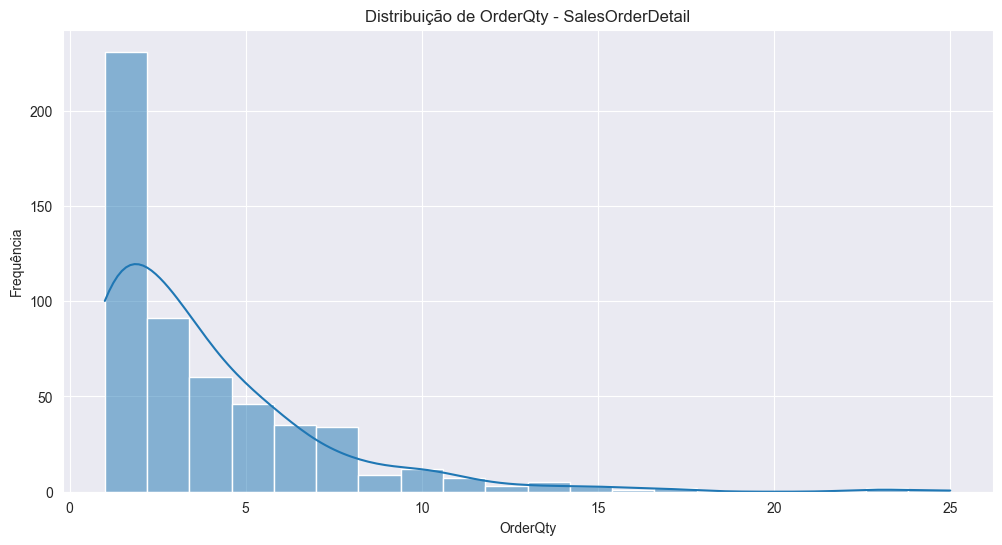

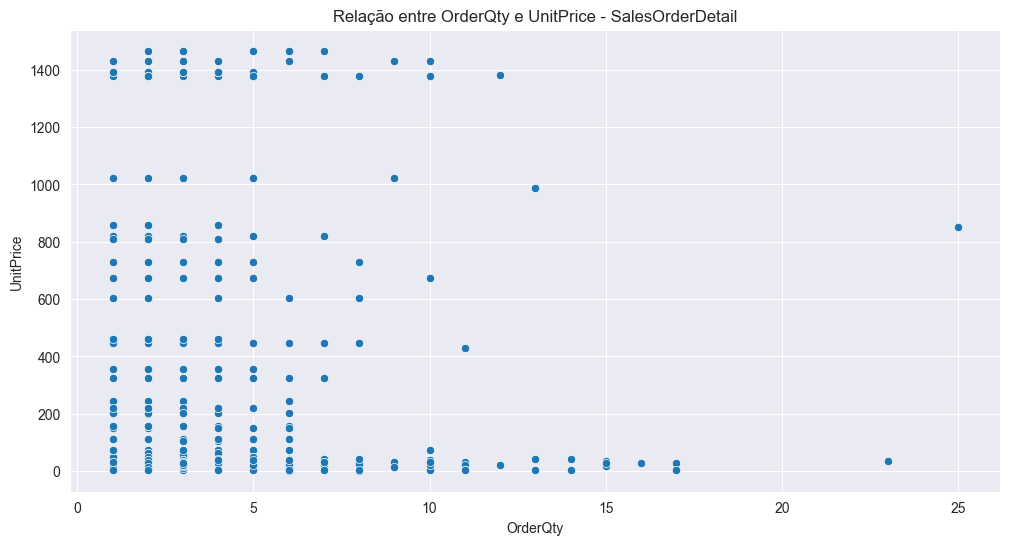

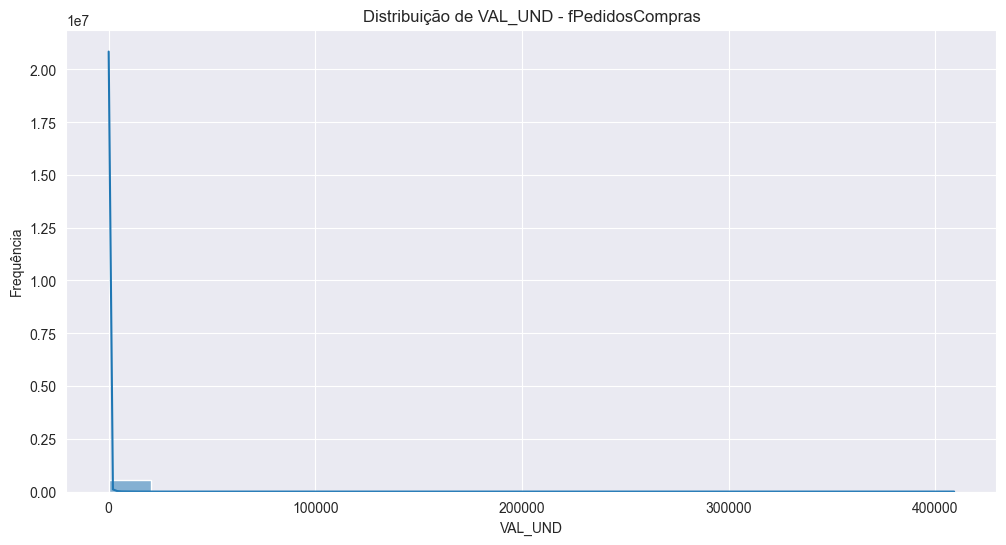

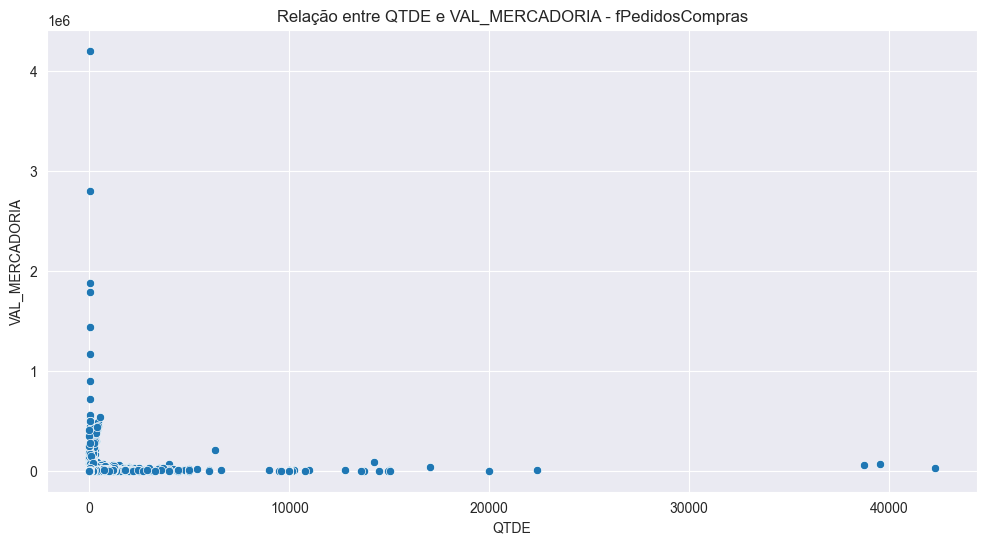

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from urllib.parse import quote_plus

# Configurando a conexão com o SQL Server
server = 'ultraflowdbserver.database.windows.net'
database = 'ultraflowdb'
username = 'usuario_ultraflow'
password = '@database.password123!'
driver = 'ODBC Driver 17 for SQL Server'

# Criando a string de conexão
connection_string = f'mssql+pyodbc://{username}:{quote_plus(password)}@{server}/{database}?driver={quote_plus(driver)}'

# Criando o engine de conexão
engine = create_engine(connection_string)

# Função para carregar dados de uma tabela específica
def load_table(table_name):
    query = f"SELECT * FROM {table_name}"
    return pd.read_sql(query, engine)

# Carregando as tabelas para análise
df_sales_header = load_table('SalesLT.SalesOrderHeader')
df_sales_detail = load_table('SalesLT.SalesOrderDetail')
df_pedidos = load_table('Suprimentos.fPedidosCompras')

# Análise Detalhada: SalesOrderHeader
plt.figure(figsize=(12, 6))
sns.histplot(df_sales_header['SubTotal'], kde=True, bins=20)
plt.title('Distribuição de SubTotal - SalesOrderHeader')
plt.xlabel('SubTotal')
plt.ylabel('Frequência')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df_sales_header['TotalDue'], kde=True, bins=20)
plt.title('Distribuição de TotalDue - SalesOrderHeader')
plt.xlabel('TotalDue')
plt.ylabel('Frequência')
plt.show()

# Análise Detalhada: SalesOrderDetail
plt.figure(figsize=(12, 6))
sns.histplot(df_sales_detail['UnitPrice'], kde=True, bins=20)
plt.title('Distribuição de UnitPrice - SalesOrderDetail')
plt.xlabel('UnitPrice')
plt.ylabel('Frequência')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df_sales_detail['OrderQty'], kde=True, bins=20)
plt.title('Distribuição de OrderQty - SalesOrderDetail')
plt.xlabel('OrderQty')
plt.ylabel('Frequência')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='OrderQty', y='UnitPrice', data=df_sales_detail)
plt.title('Relação entre OrderQty e UnitPrice - SalesOrderDetail')
plt.xlabel('OrderQty')
plt.ylabel('UnitPrice')
plt.show()

# Análise Detalhada: fPedidosCompras
plt.figure(figsize=(12, 6))
sns.histplot(df_pedidos['VAL_UND'], kde=True, bins=20)
plt.title('Distribuição de VAL_UND - fPedidosCompras')
plt.xlabel('VAL_UND')
plt.ylabel('Frequência')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='QTDE', y='VAL_MERCADORIA', data=df_pedidos)
plt.title('Relação entre QTDE e VAL_MERCADORIA - fPedidosCompras')
plt.xlabel('QTDE')
plt.ylabel('VAL_MERCADORIA')
plt.show()


### Exemplo 1: Soma de VAL_MERCADORIA Agrupada por REGIONAL_CC

In [24]:
import pandas as pd
from sqlalchemy import create_engine
from urllib.parse import quote_plus

# Configurando a conexão com o SQL Server
server = 'ultraflowdbserver.database.windows.net'
database = 'ultraflowdb'
username = 'usuario_ultraflow'
password = '@database.password123!'
driver = 'ODBC Driver 17 for SQL Server'

# Criando a string de conexão
connection_string = f'mssql+pyodbc://{username}:{quote_plus(password)}@{server}/{database}?driver={quote_plus(driver)}'

# Criando o engine de conexão
engine = create_engine(connection_string)

# Consulta SQL para agregar soma de VAL_MERCADORIA por REGIONAL_CC
query = """
SELECT
  REGIONAL_CC,
  SUM(VAL_MERCADORIA) AS total_val_mercadoria
FROM
  Suprimentos.fPedidosCompras
GROUP BY
  REGIONAL_CC
"""

# Executando a consulta e carregando os resultados em um DataFrame
df_result = pd.read_sql(query, engine)

# Exibindo os resultados
print(df_result)


            REGIONAL_CC  total_val_mercadoria
0      AMAZONAS ENERGIA          8.393735e+04
1                BENGUI          5.840387e+05
2                   CEB          4.547940e+03
3                CELESC          7.687975e+05
4                  CELG          5.552774e+06
5    CELPA CENTRO OESTE          1.634320e+07
6           CELPA GERAL          5.209584e+04
7        CELPA NORDESTE          3.594820e+07
8           CELPA NORTE          1.217458e+06
9           CELPA OESTE          2.760824e+07
10              CELTINS          4.978430e+03
11                CEMAR          9.791105e+04
12                CEMAT          1.219110e+06
13            COELBA A7          4.503953e+06
14  COELBA CENTRO OESTE          3.273246e+06
15       COELBA ITABUNA          2.882616e+07
16               COELCE          1.026317e+08
17          CORPORATIVO          1.085399e+07
18           ENEL GERAL          1.873014e+07
19           ENEL LAGOS          4.336565e+07
20           ENEL SERRA          2

### Exemplo 2: Soma de VAL_MERCADORIA Agrupada por REGIONAL_CC e Ano_Mes

In [25]:
import pandas as pd
from sqlalchemy import create_engine
from urllib.parse import quote_plus

# Configurando a conexão com o SQL Server
server = 'ultraflowdbserver.database.windows.net'
database = 'ultraflowdb'
username = 'usuario_ultraflow'
password = '@database.password123!'
driver = 'ODBC Driver 17 for SQL Server'

# Criando a string de conexão
connection_string = f'mssql+pyodbc://{username}:{quote_plus(password)}@{server}/{database}?driver={quote_plus(driver)}'

# Criando o engine de conexão
engine = create_engine(connection_string)

# Consulta SQL para agregar soma de VAL_MERCADORIA por REGIONAL_CC e Ano_Mes
query = """
SELECT
  REGIONAL_CC,
  FORMAT(DT_EMISSAO_PC, 'yyyyMM') AS ano_mes,
  SUM(VAL_MERCADORIA) AS total_val_mercadoria
FROM
  Suprimentos.fPedidosCompras
GROUP BY
  REGIONAL_CC,
  FORMAT(DT_EMISSAO_PC, 'yyyyMM')
"""

# Executando a consulta e carregando os resultados em um DataFrame
df_result = pd.read_sql(query, engine)

# Exibindo os resultados
print(df_result)


             REGIONAL_CC ano_mes  total_val_mercadoria
0            CORPORATIVO  202003          3.501818e+05
1               ENERGISA  202002          2.268900e+02
2    COELBA CENTRO OESTE  202012          1.724164e+05
3                  CEMAR  201910          2.410020e+03
4               IP BELEM  201907          1.114035e+06
..                   ...     ...                   ...
561          IP SANTAREM  202002          5.705184e+04
562     AMAZONAS ENERGIA  201910          4.437200e+02
563             ENERGISA  201912          2.121400e+02
564                 CELG  201903          2.767270e+05
565               BENGUI  202007          8.722700e+03

[566 rows x 3 columns]


### Exemplo 1: Soma de VAL_MERCADORIA Usando SQL (via SQLAlchemy)

In [26]:
import pandas as pd
from sqlalchemy import create_engine
from urllib.parse import quote_plus

# Configurando a conexão com o SQL Server
server = 'ultraflowdbserver.database.windows.net'
database = 'ultraflowdb'
username = 'usuario_ultraflow'
password = '@database.password123!'
driver = 'ODBC Driver 17 for SQL Server'

# Criando a string de conexão
connection_string = f'mssql+pyodbc://{username}:{quote_plus(password)}@{server}/{database}?driver={quote_plus(driver)}'

# Criando o engine de conexão
engine = create_engine(connection_string)

# Consulta SQL para somar VAL_MERCADORIA
query = """
SELECT
  SUM(VAL_MERCADORIA) AS total_val_mercadoria
FROM
  Suprimentos.fPedidosCompras
"""

# Executando a consulta e carregando o resultado em um DataFrame
df_result = pd.read_sql(query, engine)

# Exibindo o resultado da soma
print("Soma total de VAL_MERCADORIA (via SQL):")
print(df_result)


Soma total de VAL_MERCADORIA (via SQL):
   total_val_mercadoria
0          3.788682e+08


### Exemplo 2: Soma de VAL_MERCADORIA Usando pandas

In [27]:
import pandas as pd
from sqlalchemy import create_engine
from urllib.parse import quote_plus

# Configurando a conexão com o SQL Server
server = 'ultraflowdbserver.database.windows.net'
database = 'ultraflowdb'
username = 'usuario_ultraflow'
password = '@database.password123!'
driver = 'ODBC Driver 17 for SQL Server'

# Criando a string de conexão
connection_string = f'mssql+pyodbc://{username}:{quote_plus(password)}@{server}/{database}?driver={quote_plus(driver)}'

# Criando o engine de conexão
engine = create_engine(connection_string)

# Carregando todos os dados da tabela fPedidosCompras em um DataFrame
df_pedidos = pd.read_sql("SELECT * FROM Suprimentos.fPedidosCompras", engine)

# Calculando a soma de VAL_MERCADORIA usando pandas
total_val_mercadoria_pandas = df_pedidos['VAL_MERCADORIA'].sum()

# Exibindo o resultado da soma
print("Soma total de VAL_MERCADORIA (via pandas):")
print(total_val_mercadoria_pandas)


Soma total de VAL_MERCADORIA (via pandas):
378868179.3049548
